In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

df=pd.read_csv("../data/processed/daily_demand.csv")
df["date"]=pd.to_datetime(df["date"])

df.head()

C:\Users\Lovleen\AppData\Local\Temp\ipykernel_17944\1443445239.py:11: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("../data/processed/daily_demand.csv")


,StockCode,date,Price,Quantity
0,10002,2009-12-01,0.85,12
1,10002,2009-12-03,0.85,7
2,10002,2009-12-04,0.85,73
3,10002,2009-12-06,0.85,49
4,10002,2009-12-07,0.85,2


In [2]:
# Feature Engineering
df["day"] = df["date"].dt.day
df["month"] = df["date"].dt.month
df["day_of_week"] = df["date"].dt.dayofweek
df["is_weekend"] = df["day_of_week"].isin([5, 6]).astype(int)

In [3]:
FEATURES=[
    "Price",
    "day",
    "month",
    "day_of_week",
    "is_weekend"
]

x=df[FEATURES]
y=df["Quantity"]

In [4]:
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=42
)

In [5]:
lr=LinearRegression()
lr.fit(x_train,y_train)

y_pred_lr=lr.predict(x_test)

print("Linear Regression MAE: ",mean_absolute_error(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression MAE:  25.568211215742433
Linear Regression RMSE: 144.87707017147144


In [6]:
rf=RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest MAE: 19.978110729780198
Random Forest RMSE: 110.08327421229515


 Getting RMSE too large as comapred to MAE:-

* MAE = average absolute error
* RMSE = penalizes large errors very heavily

If most predictions are okay but a few are very wrong, then:
* MAE → stays moderate
* RMSE → becomes very large

Dataset likely has:
* Many days with low–medium demand
* A few days with very high demand spikes (bulk orders, holidays, promotions)

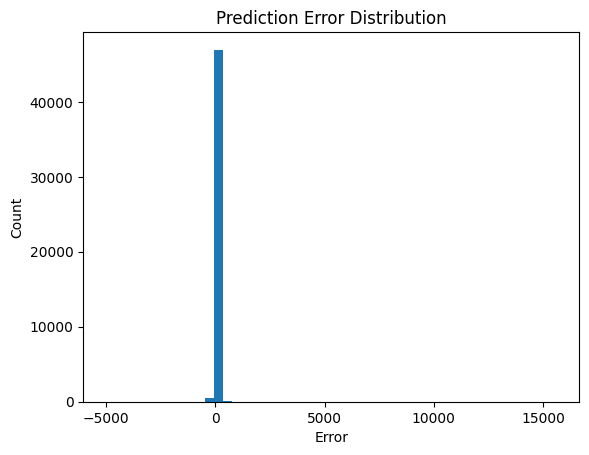

In [9]:
errors = y_test - y_pred_rf

plt.hist(errors, bins=50)
plt.title("Prediction Error Distribution")
plt.xlabel("Error")
plt.ylabel("Count")
plt.show()

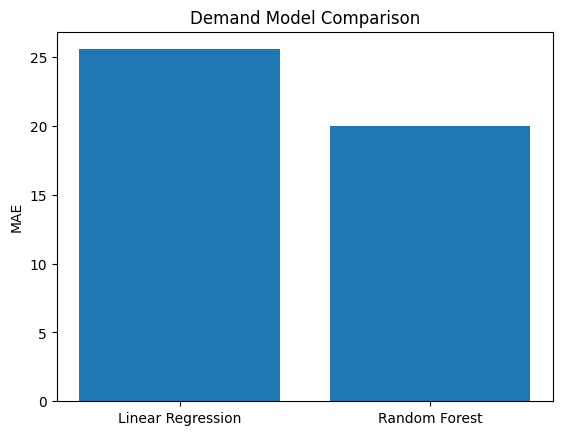

In [7]:
# Comparison plot 
models=["Linear Regression","Random Forest"]
mae_scores=[
    mean_absolute_error(y_test, y_pred_lr),
    mean_absolute_error(y_test, y_pred_rf)
]

plt.bar(models, mae_scores)
plt.ylabel("MAE")
plt.title("Demand Model Comparison")
plt.show()

In [10]:
mae_scores

[25.568211215742433, 19.978110729780198]

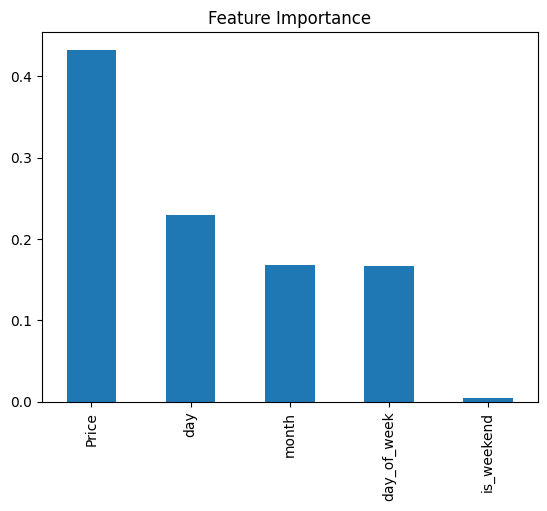

In [8]:
importances=pd.Series(
    rf.feature_importances_,
    index=FEATURES
).sort_values(ascending=False)

importances.plot(kind="bar",title="Feature Importance")
plt.show()

In [11]:
import joblib
joblib.dump(rf,"../data/processed/demand_model.pkl")

['../data/processed/demand_model.pkl']